In [1]:
import subprocess 
import os 

import pandas as pd
import json 

import requests 
from bs4 import BeautifulSoup

pd.set_option('display.max_rows',500)

# Data Understanding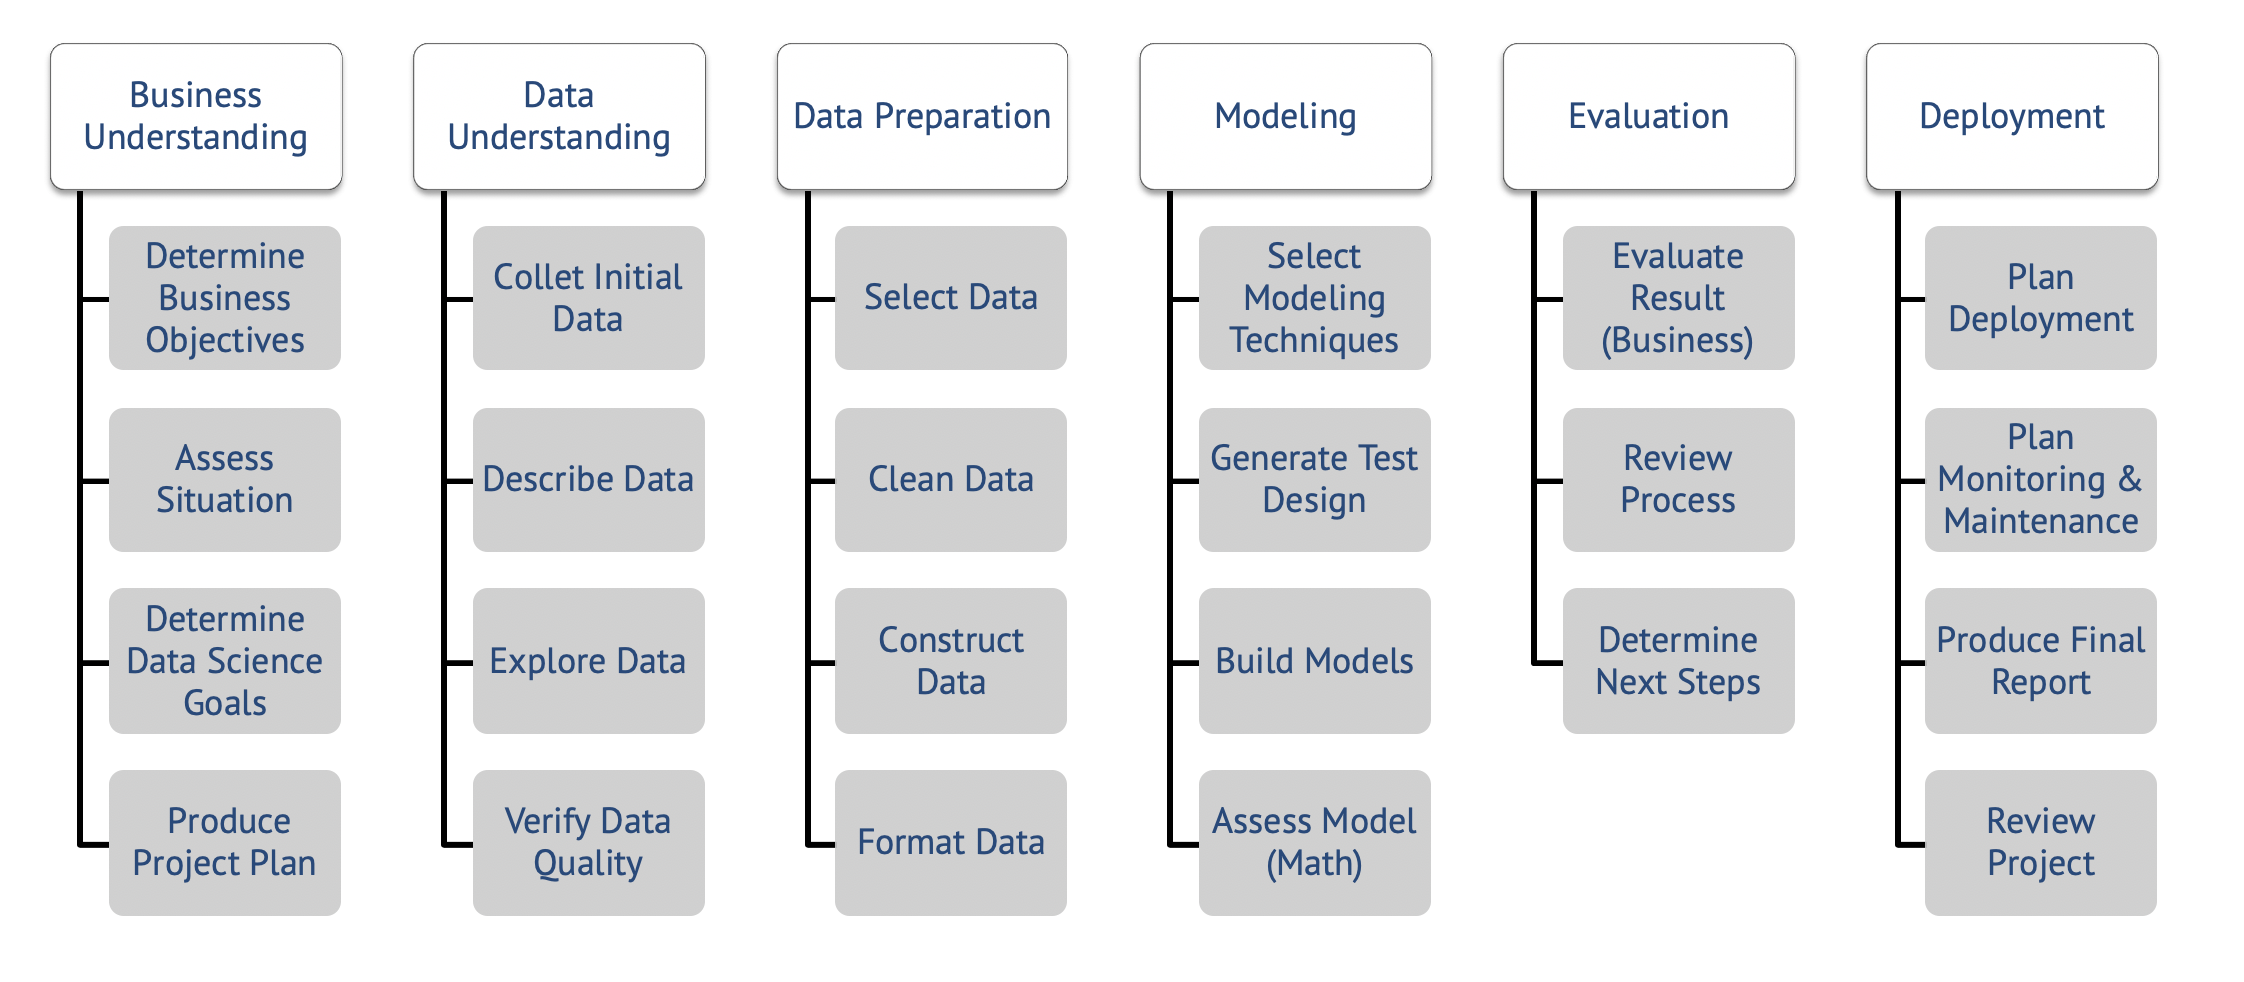

# GITHUB csv data

In [2]:
pd.read_csv('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,92,92,93,93,93,93,93,94,94,94
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,268574,276072,282437,289100,294569,299126,305966,312659,320884,329043
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,40794,41023,41299,41495,41663,41701,41846,42056,42319,42477
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3927,3936,3945,3950,3957,3959,3966,3971,3972,3981


# WEBSCRAPPING

In [3]:
page = requests.get("https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html")

In [4]:
soup = BeautifulSoup(page.content, 'html.parser')

In [5]:
html_table=soup.find('table')

In [6]:
all_rows=html_table.find_all('tr')

In [7]:
html_table.find_all('tr')

[<tr><th colspan="1" rowspan="1">Bundes­land</th><th class="center" colspan="5" rowspan="1">Elektro­nisch über­mittelte Fälle</th></tr>,
 <tr><th colspan="1" rowspan="1"></th><th class="center" colspan="1" rowspan="1">An­zahl</th><th class="center" colspan="1" rowspan="1">Dif­fe­renz<br/>
 zum <br/>
 Vor­tag</th><th class="center" colspan="1" rowspan="1">Fälle<br/>
 in den <br/>
 letzten<br/>
 7 Tagen</th><th class="right" colspan="1" rowspan="1">7-Tage-<br/>
 Inzi­denz</th><th class="center" colspan="1" rowspan="1">Todes­fälle</th></tr>,
 <tr class="even"><td colspan="1" rowspan="1">Baden-Württem­berg</td><td class="right" colspan="1" rowspan="1">44.396</td><td class="right" colspan="1" rowspan="1">+278</td><td class="right" colspan="1" rowspan="1">1.500</td><td class="right" colspan="1" rowspan="1">13,6</td><td class="right" colspan="1" rowspan="1">1.868</td></tr>,
 <tr><td colspan="1" rowspan="1">Bayern</td><td class="right" colspan="1" rowspan="1">60.759</td><td class="right" colsp

In [8]:
final_data_list=[]

In [9]:
for pos,rows in enumerate(all_rows):
    
    col_list = [each_col.get_text(strip=True) for each_col in rows.find_all('td')]
    final_data_list.append(col_list)
 

In [10]:
pd.DataFrame(final_data_list).dropna().rename(columns={0:'state',
                                                      1:'cases',
                                                      2:"changes",
                                                      3:'cases_per_100K',
                                                      4:'fatal',
                                                      5:'comment'})

,state,cases,changes,cases_per_100K,fatal,comment
2,Baden-Württem­berg,44.396,+278,1.500,"13,6",1.868
3,Bayern,60.759,+638,2.396,"18,3",2.644
4,Berlin,11.951,+72,459,"12,2",226
5,Branden­burg,3.966,+7,64,"2,5",169
6,Bremen,2.094,+9,58,"8,5",58
7,Hamburg,6.626,+99,213,"11,6",267
8,Hessen,16.500,+125,698,"11,1",537
9,Meck­lenburg-Vor­pommern,1.044,+6,29,"1,8",20
10,Nieder­sachsen,17.572,+118,495,"6,2",665
11,Nord­rhein-West­falen,61.201,+323,1.589,"8,9",1.827


## REST API calls

In [11]:
data = requests.get('https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/Coronaf%C3%A4lle_in_den_Bundesl%C3%A4ndern/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')

In [12]:
import json

In [13]:
json_object=json.loads(data.content)

In [14]:
type(json_object)

dict

In [15]:
json_object.keys()

dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'geometryProperties', 'serverGens', 'geometryType', 'spatialReference', 'fields', 'features'])

In [16]:
full_list=[]
for pos,each_dict in enumerate (json_object['features'][:]):
    full_list.append(each_dict['attributes'])
    

In [17]:
pd_full_list=pd.DataFrame(full_list)
pd_full_list.head()

,OBJECTID_1,LAN_ew_AGS,LAN_ew_GEN,LAN_ew_BEZ,LAN_ew_EWZ,OBJECTID,Fallzahl,Aktualisierung,AGS_TXT,GlobalID,faelle_100000_EW,Shape__Area,Shape__Length,Death
0,1,01,Schleswig-Holstein,Land,2896712,15,4197,1599688800000,01,fc5ba936-c95c-432c-8a33-9eb2f30b660f,144.888411,4.573731e+10,2.881496e+06,161
1,2,02,Hamburg,Freie und Hansestadt,1841179,6,6626,1599688800000,02,0f3e860c-5181-4d3f-a421-1d51f50315ea,359.878100,2.089396e+09,4.188002e+05,267
2,3,03,Niedersachsen,Land,7982448,9,17572,1599688800000,03,3fd77024-c29b-4843-9be8-682ad48e60c9,220.132972,1.299836e+11,4.008988e+06,665
3,4,04,Bremen,Freie Hansestadt,682986,5,2094,1599688800000,04,4132268b-54de-4327-ac1e-760e915112f1,306.594864,1.119157e+09,3.357177e+05,58
4,5,05,Nordrhein-Westfalen,Land,17932651,10,61201,1599688800000,05,561d658f-3ee5-46e3-bc95-3528c6558ab9,341.282502,8.782936e+10,2.648673e+06,1827
